# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read File

In [2]:
df = pd.read_csv("housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Data Cleaning

In [5]:
#Dropping null values
df.dropna(inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


# Exploratory Data Analysis

## 1. House Value Analysis

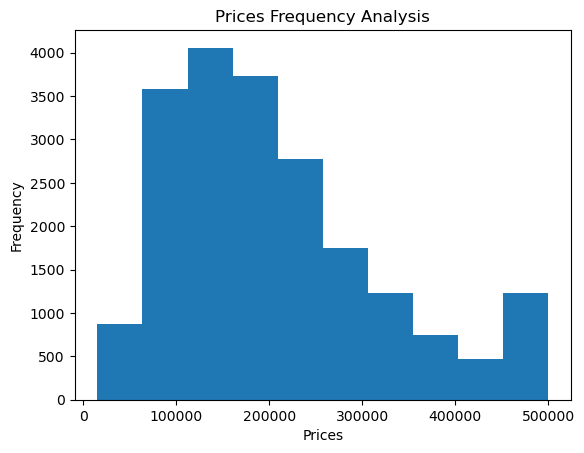

In [7]:
#House Prices
plt.hist(df["median_house_value"])
plt.xlabel("Prices")
plt.ylabel("Frequency")
plt.title("Prices Frequency Analysis");

In [8]:
#Average house value
df["median_house_value"].mean()

206864.41315519012

In [9]:
#Maximum House Value
int(df["median_house_value"].max())

500001

In [10]:
#Minimum House Value
int(df["median_house_value"].min())

14999

## 2. Bedrooms Analysis

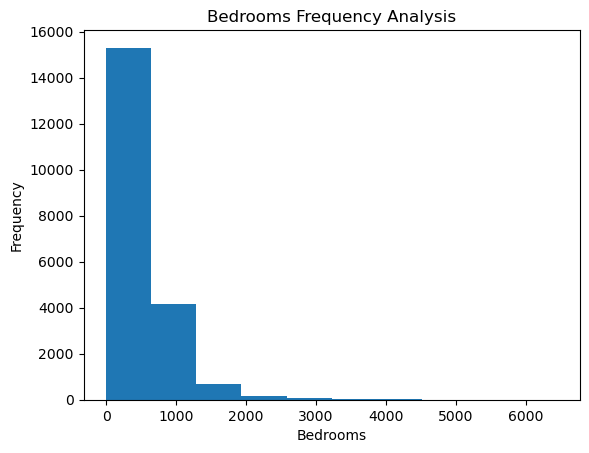

In [11]:
# Bedrooms 
plt.hist(df["total_bedrooms"])
plt.xlabel("Bedrooms")
plt.ylabel("Frequency")
plt.title("Bedrooms Frequency Analysis");

In [12]:
#Average Number of Bedrooms
int(df["total_bedrooms"].mean())

537

In [13]:
#Maximum Number of Bedrooms
int(df["total_bedrooms"].max())

6445

In [14]:
#Minimum Number of Bedrooms
int(df["total_bedrooms"].min())

1

## 3. Ocean Proximity Analysis (Frequency)

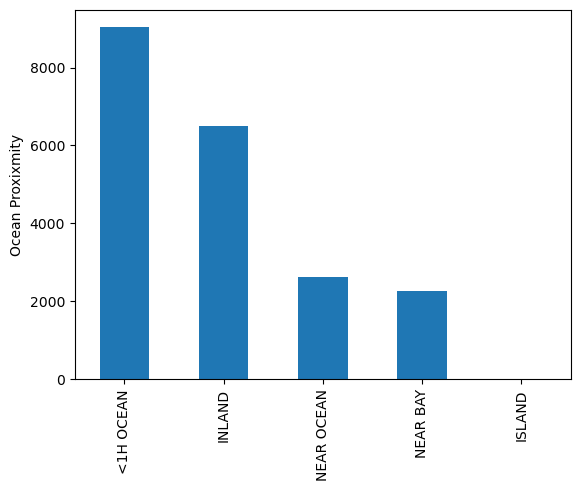

In [15]:
df["ocean_proximity"].value_counts().plot(
kind="bar",
ylabel = "Ocean Proxixmity");

## 4. What is the percentage of the population of each Ocean Proximity?

In [16]:
x = df.groupby("ocean_proximity").agg(population=("population","mean"))

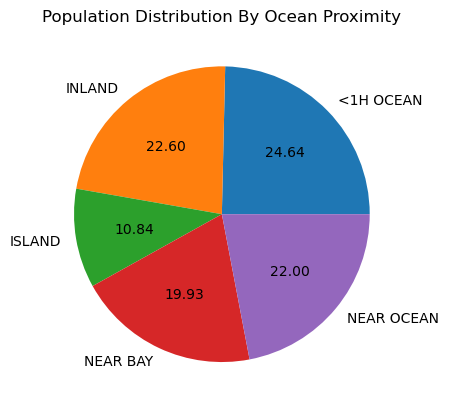

In [17]:
plt.pie(labels=x.index,x=x["population"].values,autopct="%0.2f")
plt.title("Population Distribution By Ocean Proximity");

## 5. What is the distribution of the income in accordance to Ocean Proximity?

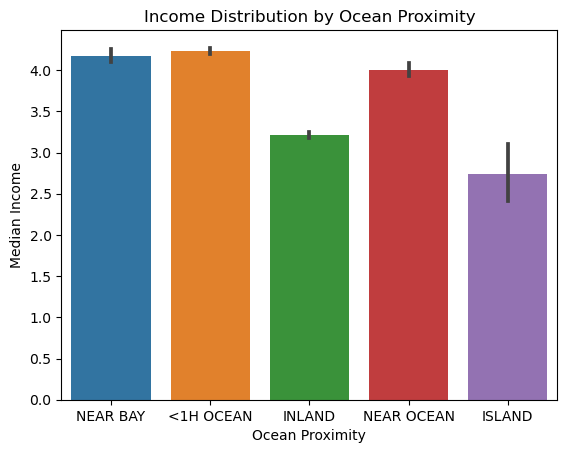

In [18]:
sns.barplot(x="ocean_proximity",y="median_income",data=df);
plt.xlabel('Ocean Proximity')
plt.ylabel('Median Income')
plt.title('Income Distribution by Ocean Proximity')
plt.show()

## 6. What is the count of the bedrooms of each Ocean Proximity?

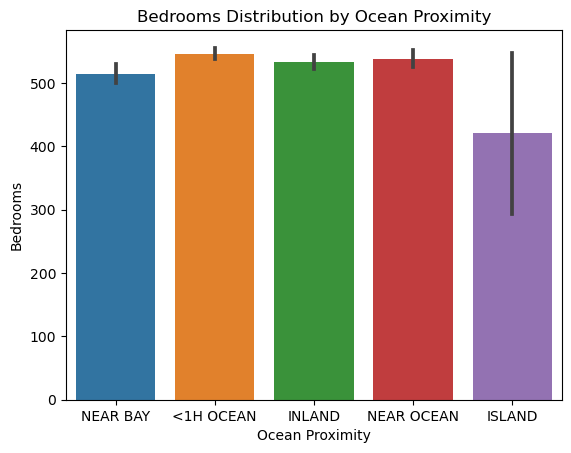

In [19]:
sns.barplot(x="ocean_proximity",y="total_bedrooms",data=df);
plt.xlabel('Ocean Proximity')
plt.ylabel('Bedrooms')
plt.title('Bedrooms Distribution by Ocean Proximity')
plt.show()

## 7. What are the top 5 Median House Values?

In [20]:
x= df[df["median_house_value"]==df["median_house_value"]]
x_index=np.arange(len(x))

In [21]:
x2 = x.sort_values(by = "median_house_value",ascending = False) 
x2 = x.set_index(x_index)

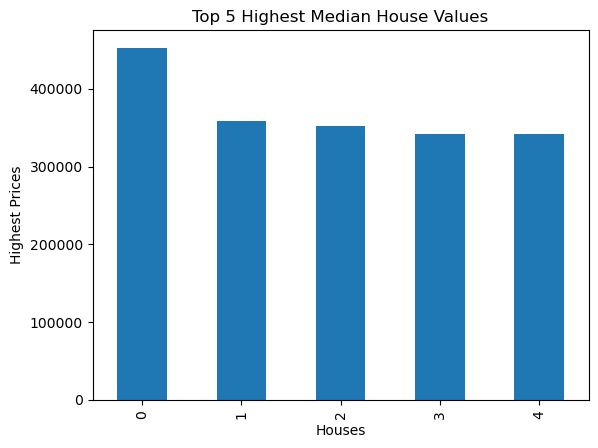

In [22]:
x2["median_house_value"].head(5).plot(kind = "bar",
                                     xlabel = "Houses",
                                     ylabel = "Highest Prices",
                                     title = "Top 5 Highest Median House Values");

## 8. Household Analysis 

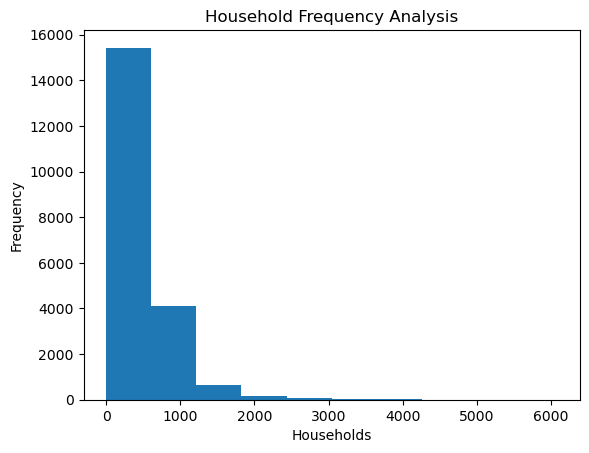

In [23]:
plt.hist(df["households"])
plt.xlabel("Households")
plt.ylabel("Frequency")
plt.title("Household Frequency Analysis");

## 9. What is the household distribution in accordance to Ocean Proximity? 

In [24]:
hh_df = df.groupby("ocean_proximity").agg(households = ("households","mean"))

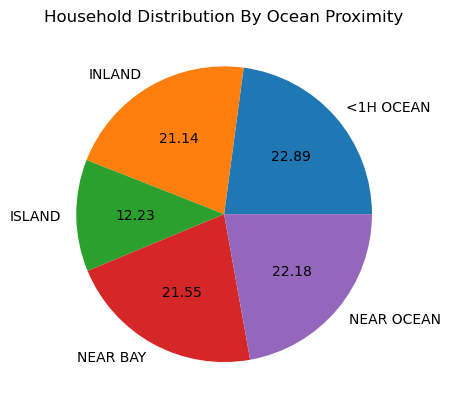

In [25]:
plt.pie(hh_df["households"].values,labels = hh_df.index, autopct="%0.2f")
plt.title("Household Distribution By Ocean Proximity");

## 10. What is the VALUE classification in accordance to HOUSE AGE categories?

In [38]:
# Dividing the age into categories
list=[]

for i in df["housing_median_age"]:
    if i < 40:
        list.append("NEW")
    elif i > 40:
        list.append("OLD")
    elif i == 40:
        list.append("NEAR LIMIT")   

In [39]:
# Creating a new coloumn 
df["AGE_CAT"] = list

In [40]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,AGE_CAT
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,OLD
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,NEW
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,OLD
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,OLD
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,OLD


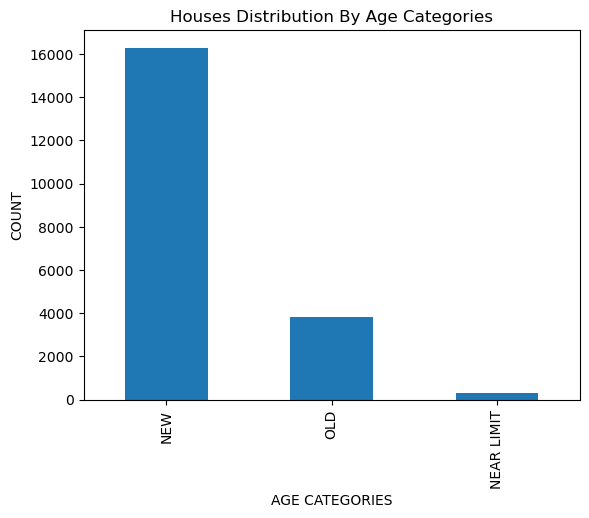

In [44]:
df["AGE_CAT"].value_counts().plot(kind = "bar",
                                xlabel = "AGE CATEGORIES",
                                 ylabel = "COUNT",
                                 title = "Houses Distribution By Age Categories");

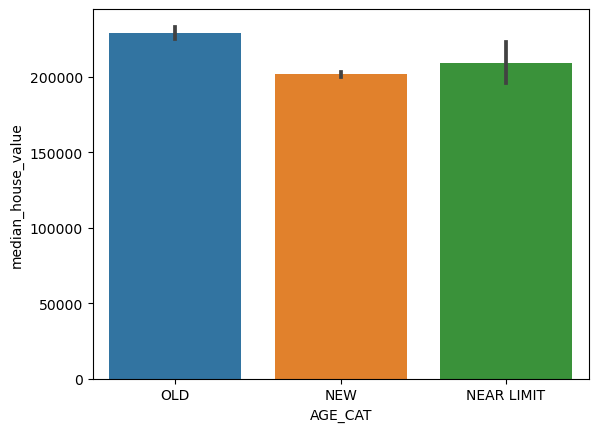

In [50]:
sns.barplot(x = df["AGE_CAT"], y = df["median_house_value"], data = df);

# Conclusion

### We can deduce from the EDA Procedures above that:
   ##### 1. The vast majority of the the houses have a value ranged between (150000 - 210000)  approximately.
   ##### 2. More than 15000 regions have Bedrooms up 700 in count.
   ##### 3. The Ocean Proximity is mostly condensed in <1H OCEAN regions.
   ##### 4. Population is significantly higher in <1H OCEAN regions followed by INLAND regions in the second place.
   ##### 5. <1H OCEAN & NEAR BAY Regions prove to be reions with the highest income.
   ##### 6. <1H OCEAN & NEAR OCEAN Regions prove to be reions with the highest nimber of bedrooms. 
   ##### 7. <1H OCEAN & NEAR possess the highest percentage of households.
   ##### 8. House ranged between 10 to 40 years (NEW) seem to possess the highest number of houses.
   ##### 9. House ranged between 40+ years (OLD) seem to possess the highest value followed by (NEAR LIMIT) houses which are aged 40 years in exact.

# Author:
   ## Mohamed Tamer Mohamed Abdelnabi